# Çapraz Doğrulama 

In [6]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('train.csv')
df= df.dropna().reset_index()
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [7]:
df.shape

(183, 13)

In [8]:
df['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [10]:
df['Embarked'].replace({'C':[0],'S':[1],'Q':0}, inplace=True)

In [11]:
df['Sex']= pd.get_dummies(df['Sex'])

In [12]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
2,6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,1
4,11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,1


In [14]:
X = df.drop(['Name', 'index','Ticket','Cabin'], axis=1)
y= df['Survived']

In [15]:
print(len(X),len(y))

183 183


In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size= 0.2)

print("Train veri kümesinin satır sayısı : {}".format(len(X_train)))
print("Train veri kümesinin hedef sayısı : {}".format(len(X_test)))
print("Test veri kümesinin satır sayısı : {}".format(len(y_train)))
print("Test veri kümesinin hedef sayısı : {}".format(len(y_test)))


Train veri kümesinin satır sayısı : 146
Train veri kümesinin hedef sayısı : 37
Test veri kümesinin satır sayısı : 146
Test veri kümesinin hedef sayısı : 37


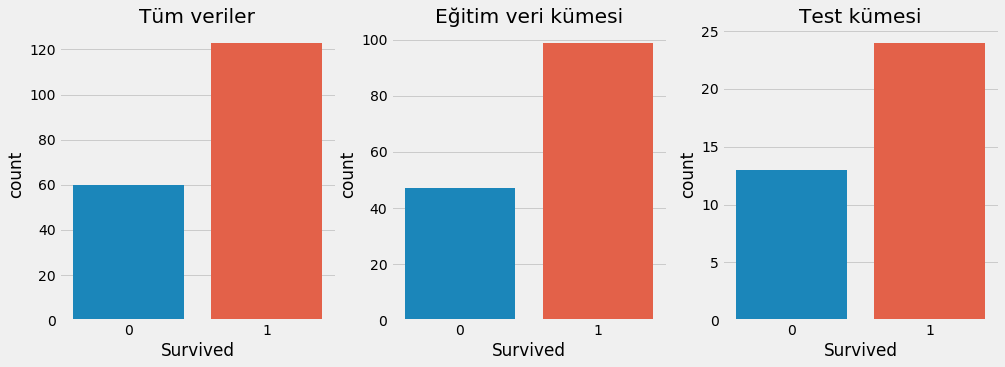

Tüm veri kümesi '0' yüzdesi : %33 
Test verisi '0' yüzdesi     : %35 
Eğitim verisi '0' yüzdesi   : %32 


In [18]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(y)
plt.title("Tüm veriler")
plt.subplot(132)
sns.countplot(y_train)
plt.title("Eğitim veri kümesi")
plt.subplot(133)
sns.countplot(y_test)
plt.title("Test kümesi")
plt.show()
print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))

Tüm veri kümesi '0' yüzdesi : %33 
Test verisi '0' yüzdesi     : %32 
Eğitim verisi '0' yüzdesi   : %33 


In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
tahmin_eğitim = model.predict(X_train)
tahmin_test = model.predict(X_test)
model.score(X_test, y_test)

1.0

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

In [28]:
parcalar = kf.split(X)
for num, (train_index, test_index) in enumerate(parcalar):
    print("{}.Eğitim Kümesi Boyutu : {}".format(num+1,len(train_index)))
    print("{}.Test Kümesi Boyutu   : {}".format(num+1,len(test_index)))
    print('-'*27)

1.Eğitim Kümesi Boyutu : 146
1.Test Kümesi Boyutu   : 37
---------------------------
2.Eğitim Kümesi Boyutu : 146
2.Test Kümesi Boyutu   : 37
---------------------------
3.Eğitim Kümesi Boyutu : 146
3.Test Kümesi Boyutu   : 37
---------------------------
4.Eğitim Kümesi Boyutu : 147
4.Test Kümesi Boyutu   : 36
---------------------------
5.Eğitim Kümesi Boyutu : 147
5.Test Kümesi Boyutu   : 36
---------------------------


In [32]:
from sklearn.metrics import mean_squared_error

model2 = LogisticRegression()
parcalar = kf.split(X)
dogruluk_liste = []

for i , (train_index, test_index) in enumerate(parcalar):
    X_train , y_train = X.iloc[train_index], y.iloc[train_index] 
    X_test , y_test = X.iloc[test_index] , y.iloc[test_index]
    model2.fit(X_train , y_train)
    tahmin = model2.predict(X_test)
    dogruluk_degeri = model.score(X_test, y_test)
    dogruluk_liste.append(dogruluk_degeri)
    print("{} Parça Doğruluk Değeri : {:.3f}".format(i+1, dogruluk_degeri))
    print("-"*30)

1 Parça Doğruluk Değeri : 1.000
------------------------------
2 Parça Doğruluk Değeri : 1.000
------------------------------
3 Parça Doğruluk Değeri : 1.000
------------------------------
4 Parça Doğruluk Değeri : 1.000
------------------------------
5 Parça Doğruluk Değeri : 1.000
------------------------------


In [33]:
print("Ortalama doğruluk değeri : {:.2f}".format(np.mean(dogruluk_liste)))

Ortalama doğruluk değeri : 1.00


In [34]:
from sklearn.model_selection import cross_validate, cross_val_score

In [35]:
lrm = LogisticRegression()
cv = cross_validate(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10,
                    return_train_score=True
                    )
print('Test Skorları            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Eğitim Skorları          : ', cv['train_score'], sep = '\n')

Test Skorları            : 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------------------------------
Eğitim Skorları          : 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [36]:
print('Test Kümesi   Ortalaması : ', cv['test_score'].mean())
print('Eğitim Kümesi Ortalaması : ', cv['train_score'].mean())

Test Kümesi   Ortalaması :  1.0
Eğitim Kümesi Ortalaması :  1.0


In [39]:
cv = cross_validate(estimator=lrm, 
                     X=X,
                     y=y,
                     cv=10,
                     scoring = ['accuracy', 'precision', 'r2'], return_train_score=True
                    )

In [40]:
print('Test Kümesi Doğruluk Ortalaması     : {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Kümesi R-kare  Ortalaması      : {:.2f}'.format(cv['test_r2'].mean()))
print('Test Kümesi Hassasiyet Ortalaması   : {:.2f}'.format(cv['test_precision'].mean()))
print('Eğitim Kümesi Doğruluk Ortalaması   : {:.2f}'.format(cv['train_accuracy'].mean()))
print('Eğitim Kümesi R-kare  Ortalaması    : {:.2f}'.format(cv['train_r2'].mean()))
print('Eğitim Kümesi Hassasiyet Ortalaması : {:.2f}'.format(cv['train_precision'].mean()))

Test Kümesi Doğruluk Ortalaması     : 1.00
Test Kümesi R-kare  Ortalaması      : 1.00
Test Kümesi Hassasiyet Ortalaması   : 1.00
Eğitim Kümesi Doğruluk Ortalaması   : 1.00
Eğitim Kümesi R-kare  Ortalaması    : 1.00
Eğitim Kümesi Hassasiyet Ortalaması : 1.00


In [41]:
cv = cross_val_score(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10                    
                    )
print('Model Skorları            : ', cv, sep = '\n')

Model Skorları            : 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [42]:
from sklearn.model_selection import cross_val_predict
y_tahmin = cross_val_predict(estimator=lrm, X=X, y=y, cv=10)
print(y_tahmin[0:10])

[1 1 0 1 1 1 1 0 1 0]


# Hyperparameter tuning

In [43]:
logreg = LogisticRegression()
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


# Grid Search

In [44]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [47]:
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 1, 'penalty': 'l2'}
En iyi skor         :  1.0


In [48]:
import pandas as pd

sonuçlar = grid_cv.cv_results_
df = pd.DataFrame(sonuçlar)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001299,0.000459,0.000000,0.000000,1e-05,l1,"{'C': 1e-05, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,0.009042,0.005821,0.002762,0.004448,1e-05,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.368421,0.684211,0.684211,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.640351,0.090907,10
2,0.001563,0.004688,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,0.016077,0.003254,0.000500,0.001024,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.421053,0.842105,0.789474,0.722222,0.666667,0.666667,0.611111,0.666667,0.666667,0.666667,0.671930,0.105869,9
4,0.000000,0.000000,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


In [49]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
11,l2,1,1.000000
13,l2,10,1.000000
15,l2,100,1.000000
17,l2,1000,1.000000
19,l2,10000,1.000000
9,l2,0.1,0.939474
7,l2,0.01,0.754094
5,l2,0.001,0.677485
3,l2,0.0001,0.671930
1,l2,1e-05,0.640351


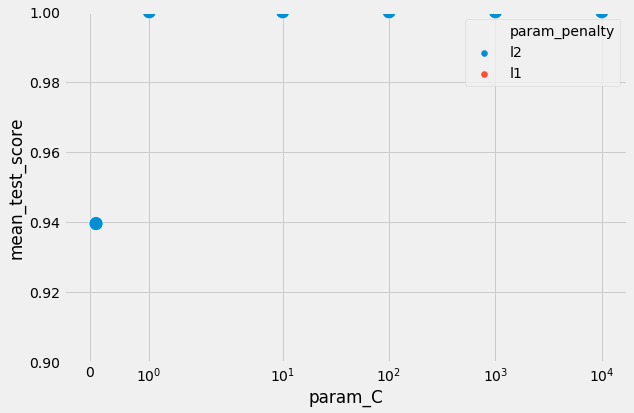

In [51]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df, s=200)
plt.xscale('symlog')
plt.ylim((0.9,1))
plt.show()

# RandomizedSearchCV

In [52]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [53]:
from sklearn.model_selection import RandomizedSearchCV
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [54]:
print("En iyi parametreler        : ", rs_cv.best_params_)
print("Tüm hassasiyet değerleri   : ", rs_cv.cv_results_['mean_test_score'])
print("En iyi hassasiyet değeri   : ", rs_cv.best_score_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 10}
Tüm hassasiyet değerleri   :  [0.70134804 0.71928221 1.         1.                nan 1.
        nan        nan        nan        nan]
En iyi hassasiyet değeri   :  1.0


In [55]:
sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)
df_rs

,param_penalty,param_C,mean_test_score
2,l2,10,1.000000
3,l2,1,1.000000
5,l2,1000,1.000000
1,l2,0.001,0.719282
0,l2,0.0001,0.701348
4,l1,100,NaN
6,l1,0.01,NaN
7,l1,0.001,NaN
8,l1,1000,NaN
9,l1,1e-05,NaN


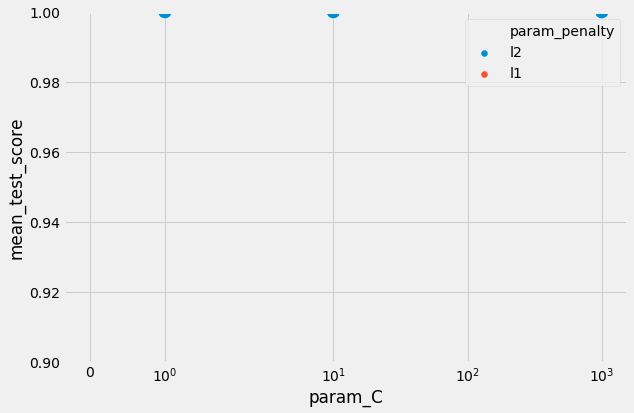

In [56]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.9,1))
plt.show()